<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/EBTIC_Advanced_AI_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [87]:
!wget https://raw.githubusercontent.com/Hameon4/Exfiltration-dataset/main/exfil_monogram.csv

--2022-07-26 06:33:00--  https://raw.githubusercontent.com/Hameon4/Exfiltration-dataset/main/exfil_monogram.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1660489 (1.6M) [text/plain]
Saving to: ‘exfil_monogram.csv.1’

exfil_monogram.csv. 100%[===================>]   1.58M  --.-KB/s    in 0.06s   

2022-07-26 06:33:00 (27.2 MB/s) - ‘exfil_monogram.csv.1’ saved [1660489/1660489]



In [88]:
# Load in the data 
df = pd.read_csv('/content/exfil_monogram.csv')

In [89]:
df

,epoll_pwait,futex,getuid,ioctl,read,mprotect,write,clock_gettime,madvise,writev,...,personality,set_tls,capget,fstatfs64,getegid32,getgid32,getgroups32,ptrace,setsid,Label
0,248,102,295,187,36,29,115,12,104,37,...,0,0,0,0,0,0,0,0,0,0
1,423,217,393,253,104,31,317,13,17,38,...,0,0,0,0,0,0,0,0,0,0
2,31,18,58,83,4,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31,20,60,85,4,2,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31,19,64,96,4,2,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,61,103,0,35,48,12,70,1019,1,5,...,0,0,0,0,0,0,0,0,0,1
6137,2,33,1,1,3,15,2,0,2,0,...,0,0,0,0,0,0,0,0,0,1
6138,158,80,0,199,71,21,85,1146,4,10,...,0,0,0,0,0,0,0,0,0,1
6139,52,12,0,26,13,5,38,291,1,5,...,0,0,0,0,0,0,0,0,0,1


In [90]:
X = df.drop(columns = ['Label']).copy()
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Validation SPlit
X_valid, X__sub_test, y_valid, y_sub_test = train_test_split(X_test,y_test, test_size=0.5)

In [91]:
D = df.shape

In [92]:
# 2 - Build/Instantiate the model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(120, 1)),
  tf.keras.layers.Conv1D(1, 70, 5),
  tf.keras.layers.MaxPool1D(),
  tf.keras.layers.Flatten(name='regions'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 11, 1)             71        
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 5, 1)             0         
 g1D)                                                            
                                                                 
 regions (Flatten)           (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Train the model 
r = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
154/154 [==============================] - 3s 11ms/step - loss: 181.0271 - accuracy: 0.5159 - val_loss: 29.7559 - val_accuracy: 0.5554
Epoch 2/20
154/154 [==============================] - 1s 6ms/step - loss: 11.1976 - accuracy: 0.6952 - val_loss: 3.8096 - val_accuracy: 0.7964
Epoch 3/20
154/154 [==============================] - 1s 7ms/step - loss: 3.0640 - accuracy: 0.8327 - val_loss: 2.2182 - val_accuracy: 0.8518
Epoch 4/20
154/154 [==============================] - 1s 6ms/step - loss: 2.1267 - accuracy: 0.8715 - val_loss: 1.6553 - val_accuracy: 0.8762
Epoch 5/20
154/154 [==============================] - 1s 6ms/step - loss: 1.5842 - accuracy: 0.8907 - val_loss: 1.2328 - val_accuracy: 0.8990
Epoch 6/20
154/154 [==============================] - 1s 5ms/step - loss: 1.1229 - accuracy: 0.8976 - val_loss: 0.8959 - val_accuracy: 0.9007
Epoch 7/20
154/154 [==============================] - 1s 6ms/step - loss: 0.8477 - accuracy: 0.9000 - val_loss: 0.8450 - val_accuracy: 0.8909
E

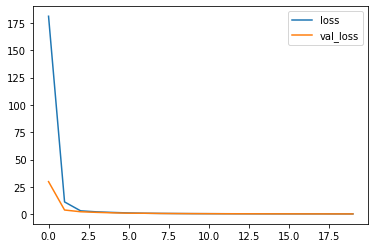

In [95]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

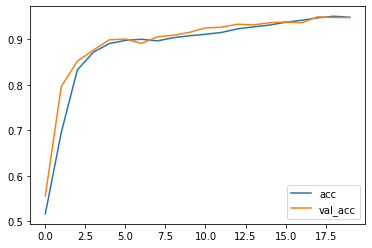

In [96]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [97]:
#  evaluate
print(model.evaluate(X_valid, y_valid))

20/20 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9479
[0.23566024005413055, 0.9478827118873596]


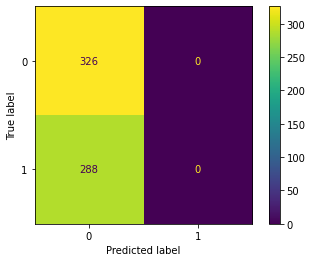

In [98]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

p_test = model.predict(X_valid).argmax(axis=1)
cm = confusion_matrix(y_valid, p_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [101]:
326+288

614

In [100]:
print(f'The accuracy is: {model.evaluate(X_valid, y_valid)[1:]}')

20/20 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9479
The accuracy is: [0.9478827118873596]
